# Final project (100pts)

- This final project contains two parts. In the first part, we will explore polynomial regression. In the second part, we will explore kernel support vector machine.

- Collaboration is highly encouraged. You can either work in a group (3 max) or work individually.

- **The due time is 11:59pm Dec 8.**

Final Project Group: Kai Bengston and Luca Bombelli


# Part 1: Polynomial Regression (50 pts)

The main goal of this part is to characterize non-linear relation between input $x$ and output $y$. The main technique we use is to write polynomial regression as a linear regression problem. Details of polynomial regression can be found on wikipedia: https://en.wikipedia.org/wiki/Polynomial_regression. 


#### Import given data

- Read data from poly_reg.csv 

- Check import data using pandas

- Save dataframe as a numpy array (delete first column which is index)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

df = pd.read_csv('poly_reg.csv',index_col='Unnamed: 0')
data = df.to_numpy()

#### Visualize data

Visualize your data to find the relation between inputs and outputs.

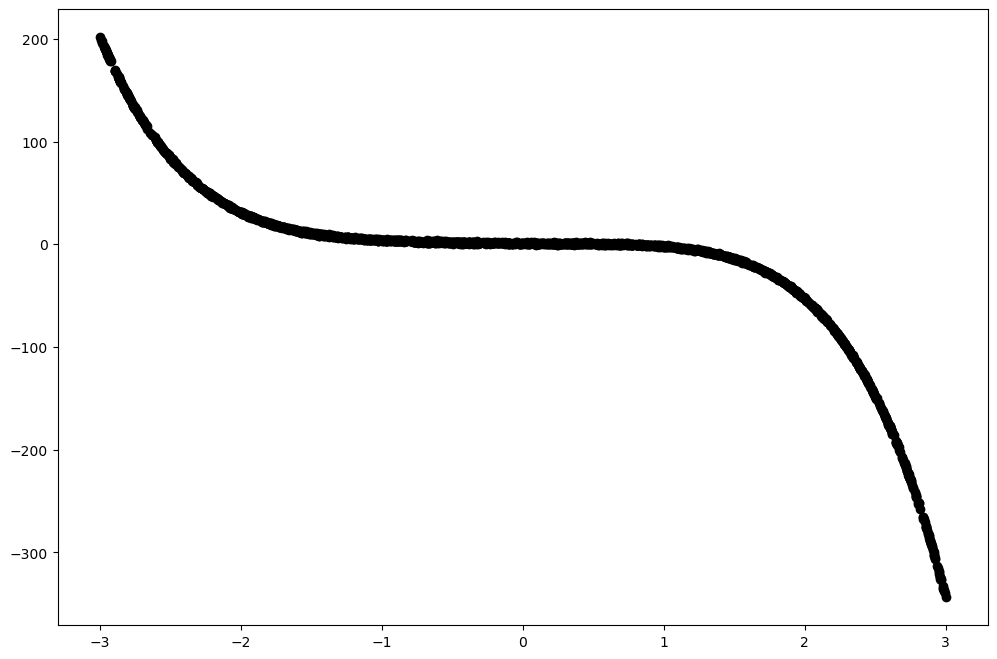

In [2]:
x_list = []
y_list = []
for i in range(len(data)):
    new = [data[i][0]]
    x_list.append(new)
for i in range(len(data)):
    new = [data[i][1]]
    y_list.append(new)
x = np.array(x_list)
y = np.array(y_list)
plt.figure(figsize = (12,8))
plt.scatter(x,y, color ='black', linewidths = 1, label ='Full Data' )
plt.show()
x = x.reshape([len(x)])
y = y.reshape([len(y)])

#### Split your data to training set,  validation set and test set

60% training set, 20% validation set and 20% test set

In [3]:
data_train, data2 = train_test_split(data, test_size=0.4)
data_val, data_test = train_test_split(data2, test_size=0.5)

list_data_val = sorted(data_val, key=lambda x: x[0])
data_val = np.array(list_data_val)

list_data_test = sorted(data_test, key=lambda x: x[0])
data_test = np.array(list_data_test)

list_data_train = sorted(data_train, key=lambda x: x[0])
data_train = np.array(list_data_train)

x_val,y_val=np.split(data_val,2,axis=1)
x_test,y_test=np.split(data_test,2,axis=1)
x_train,y_train=np.split(data_train,2,axis=1)

x_train = x_train.reshape(len(x_train))
x_test= x_test.reshape(len(x_test))
x_val = x_val.reshape(len(x_val))
y_train = y_train.reshape(len(y_train))
y_test= y_test.reshape(len(y_test))
y_val = y_val.reshape(len(y_val))



#alternative method of splitting
#x_train = np.array([])
#x_test = np.array([])
#x_val = np.array([])
#y_train = np.array([])
#y_test = np.array([])
#y_val = np.array([])
#for i in range(len(x)):
#    r = np.random.random_sample()
#    if r < 0.6:
#        x_train = np.append(x_train, [x[i]]) 
#        y_train = np.append(y_train, [y[i]]) 
#    elif r>=0.6 and r<0.8:
#        x_test = np.append(x_test, [x[i]]) 
#        y_test = np.append(y_test, [y[i]])
#    else:
#        x_val = np.append(x_val, [x[i]]) 
#        y_val = np.append(y_val, [y[i]])


#### Construct your polynomial regression model

Try to write polynomial regression model as a linear regression model. The degree of polynomial is a hyperparameter, you need to test different degrees and find the best one. You should use your training set to train all models and use the validation set to find the best hyperparameter.

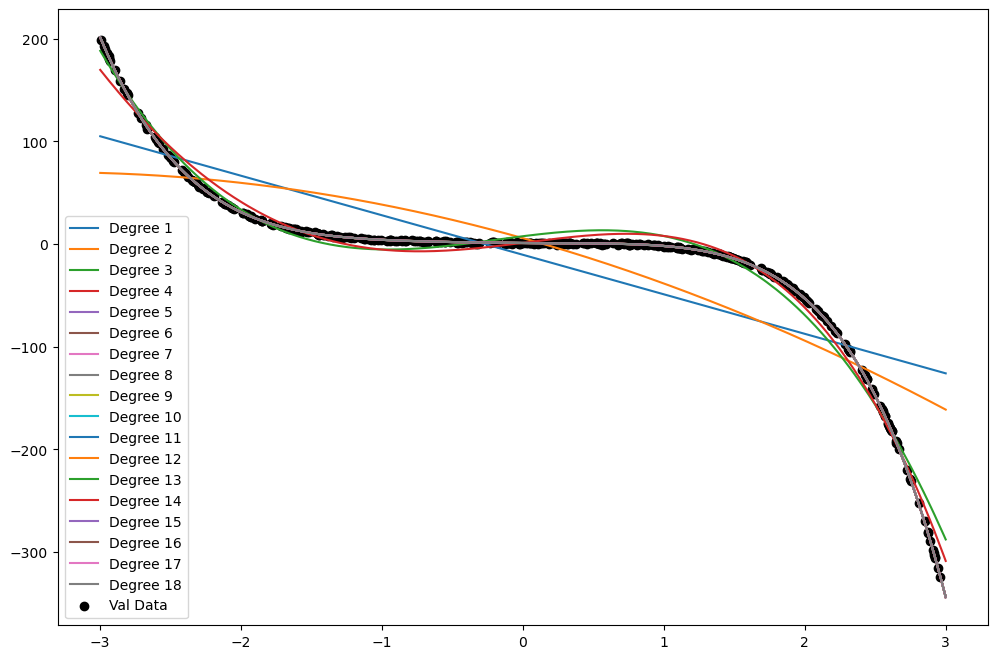

The model of best fit is a polynomial of degree  13  with an intercept of  0.9346611898470432  and ascending coeffecients of  [-1.02764366e+00  1.70866024e+00 -9.06113081e-01 -1.80508562e+00
 -1.07137064e+00  3.47232100e-01  1.94164675e-02 -6.96892271e-02
 -2.25584587e-03  6.57454726e-03  1.01094853e-04 -2.35698224e-04
 -5.71153555e-07]


In [4]:
plt.figure(figsize = (12,8))
ints = []
cos = []
list_of_regs = []
highest_degree = 18
errors = np.array([])

for i in range(1,highest_degree+1):      #loops for regression models up to the variable highest degree, that can be changed manually
    X = np.zeros([len(x_train),i])      #creates training matrix
    for j in range(i):
        X[:,j] = x_train**(j+1)
    
    X_val = np.zeros([len(x_val),i])     #creates matrix for finding error
    for j in range(i):
        X_val[:,j] = x_val**(j+1)    
             
    reg = LinearRegression().fit(X,y_train)#runs regression
    list_of_regs.append(reg)
    k = reg.coef_
    cos.append(k)    #stores coeffecients
    b = reg.intercept_
    ints.append(b)    #stores intercepts
    
    y2 = b                         
    for j in range(i):
        y2 = y2 + k[j]*x_train**(j+1)
    
    lab = 'Degree ' +str(i)
    plt.plot(x_train,y2, label = lab)     #maps regressions
    
    pred = reg.predict(X_val)        #finds error for each different degree
    err = np.linalg.norm(pred.reshape(y_val.shape) - y_val)
    errors = np.append(errors, [err])
    
plt.scatter(x_val,y_val, color ='black', linewidths = 1, label ='Val Data' )
plt.legend()
plt.show()
least_error = 0
indx = 0
for i in range(len(errors)):
    if i == 0:
        least_error = errors[i]
        indx = i
    elif errors[i] < least_error:
        least_error = errors[i]
        indx = i

print('The model of best fit is a polynomial of degree ',indx+1,' with an intercept of ',ints[indx],' and ascending coeffecients of ',cos[indx],)

#### Measure the performance of your model

Our goal is to train a model that can generalize well. The generalization property can be verified by using test data. Here, we use our model to predict on the test data and compare with true labels.

The final test error is  10.101056238183425


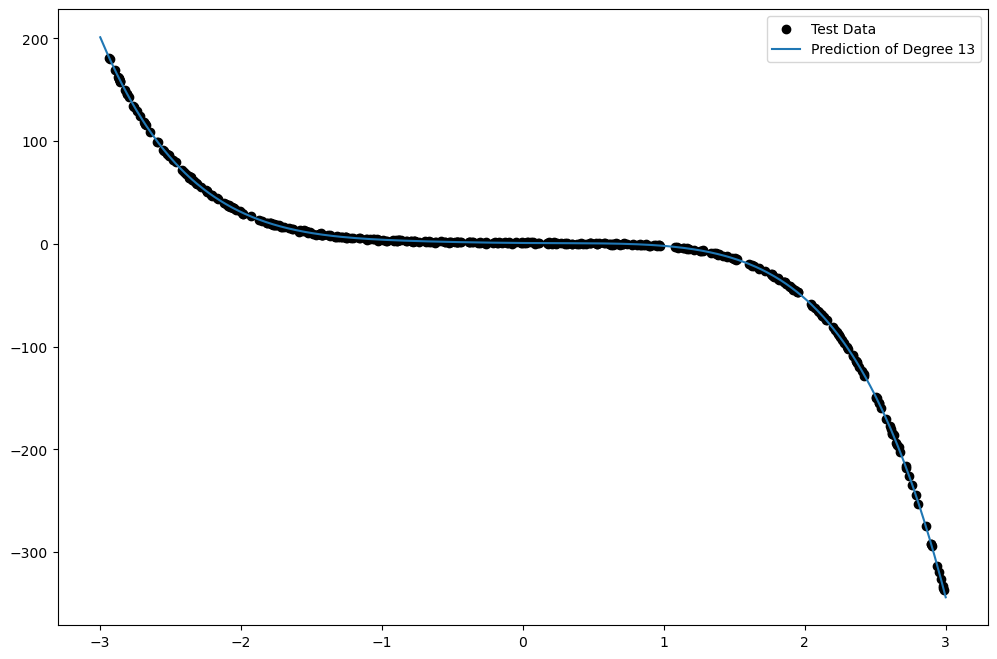

In [5]:
plt.figure(figsize = (12,8))
plt.scatter(x_test,y_test, color ='black', linewidths = 1, label ='Test Data' )
y_final = ints[indx]
co_final = cos[indx]
X_test = np.zeros([len(x_val),indx+1])     #creates matrix for finding error
for j in range(indx+1):
    X_test[:,j] = x_test**(j+1)

for j in range(indx+1):
    y_final = y_final + co_final[j]*x_train**(j+1)
lab_final = "Prediction of Degree "+str(indx+1)
reg2 = list_of_regs[indx]
y_acc = reg2.predict(X_test)
test_err = np.linalg.norm(y_acc.reshape(y_test.shape) - y_test)

print('The final test error is ',+test_err)
plt.plot(x_train,y_final, label = lab_final)
plt.legend()
plt.show()

#### Visualize your model

In this section, please plot all you data points and the model (obtained polynomial after training).   

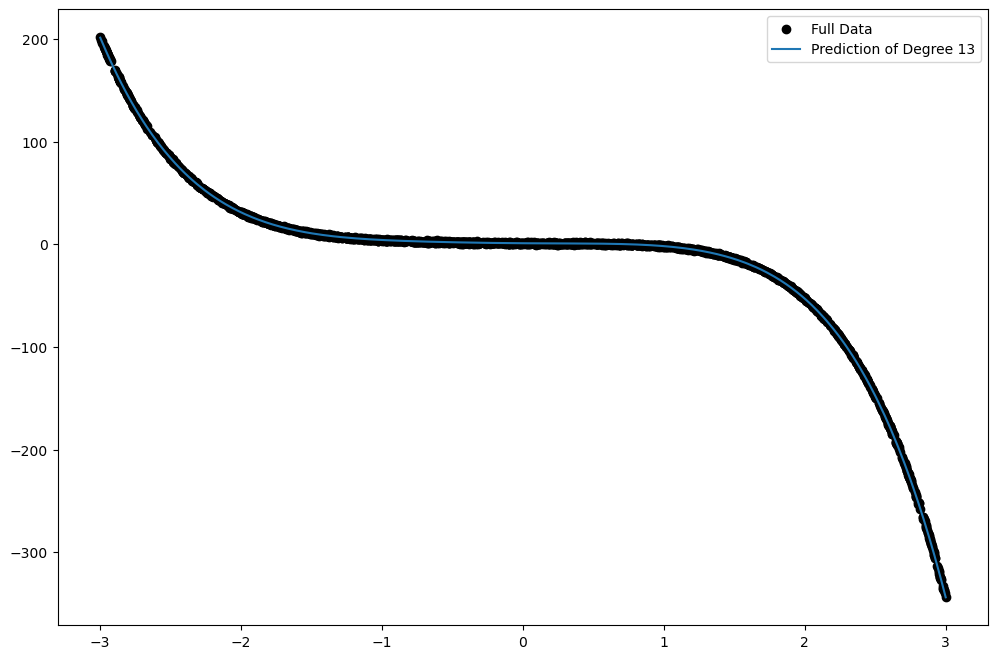

In [6]:
plt.figure(figsize = (12,8))
plt.scatter(x,y, color ='black', linewidths = 1, label ='Full Data' )
plt.plot(x_train,y_final, label = lab_final)
plt.legend()
plt.show()

### Bonus question (20 pts):

`numpy.polyfit` can be used to implement polynomial regression as well. Please read the documentation https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html and redo polynomial regression ( use the same training data set ). Please report(print) the obtained coefficient and compare this result with what you obtained using linear regression.

Remark: To implement polynomial regression, `Polyfit` is more favorable because we do not need to stack data matrix $X$. However, linear model is a fundamental model because many non-linear models can be written as a linear regression model, e.g. consider the following model:

$$ y = a_1 + a_2x+a_3x^2 + a_4\sin(x) + a_5\exp(x)$$

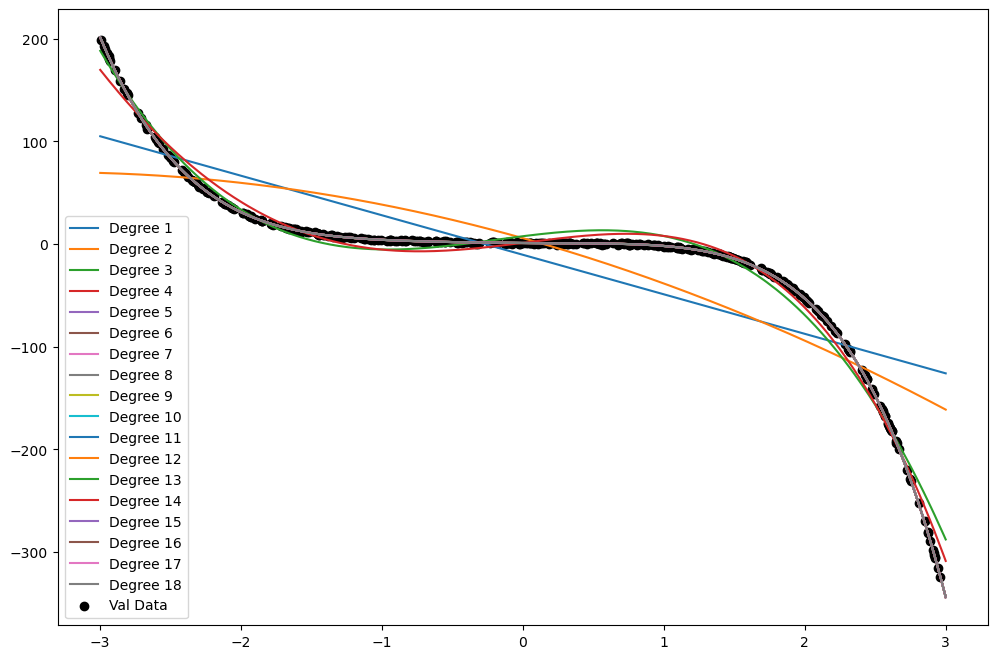

By polynomial regression, the best fit is the prediction with degree  13 with intecept and ascending coeffecients  [ 9.34661190e-01 -1.02764366e+00  1.70866024e+00 -9.06113081e-01
 -1.80508562e+00 -1.07137064e+00  3.47232100e-01  1.94164675e-02
 -6.96892271e-02 -2.25584587e-03  6.57454726e-03  1.01094853e-04
 -2.35698224e-04 -5.71153555e-07] 

Both linear regression and polynomial regresssion found the best fit to be a polynomial of degree  13


In [7]:
plt.figure(figsize = (12,8))
cos2 = []
errors2 = np.array([])
for i in range(1,highest_degree+1):      
             
    polyreg = np.polyfit(x_train,y_train,deg = i)#runs regression
    
    k2 = polyreg[::-1]
    cos2.append(k2)
    y_poly = k2[0]
    
    for j in range(i):
        y_poly =  y_poly + k2[j+1]*x_train**(j+1)
    lab2 = 'Degree ' +str(i)
    plt.plot(x_train,y_poly, label = lab2)
    
    pred2 = np.polyval(polyreg, x_val) 
    abs_err2 = np.linalg.norm(pred2 - y_val)
    errors2 = np.append(errors2, [abs_err2])
    
least_error2 = 0
indx2 = 0
for i in range(len(errors2)):
    if i == 0:
        least_error2 = errors2[i]
        indx2 = i
    elif errors2[i] < least_error2:
        least_error2 = errors2[i]
        indx2 = i
        
plt.scatter(x_val,y_val, color ='black', linewidths = 1, label ='Val Data' )
plt.legend()
plt.show()
print('By polynomial regression, the best fit is the prediction with degree ',+(indx2+1), "with intecept and ascending coeffecients ",+cos2[indx],'\n')
if indx2 == indx:
    print("Both linear regression and polynomial regresssion found the best fit to be a polynomial of degree ",+indx2+1)
else:
    print("Linear regression found the best fit to be a polynomial of degree ",+indx+1,", while polynomial regression found the best fit to be a polynomial of degree ",indx2+1)

## Kernel Support Vector Machine (50 pts)

During the lecture, we introduce support vector machine (SVM) which creates a linear boundary to separate data. However, SVM also allows us to create non-linear boundary to separate data. The trick used here is called kernel trick, see wikipedia https://en.wikipedia.org/wiki/Kernel_method.

The main idea of kernel trick is to lift data to a higher dimension space where there exists a linear bounday to separate data, then we apply original SVM.


The following plots explain kernel trick geometrically. Consider the following data points on the x-axis, we assume points x=-1, x=0, and x=1 belonging to one class and points x=-2, x=2 belonging to another class. There is no linear boundary to seperate those points.

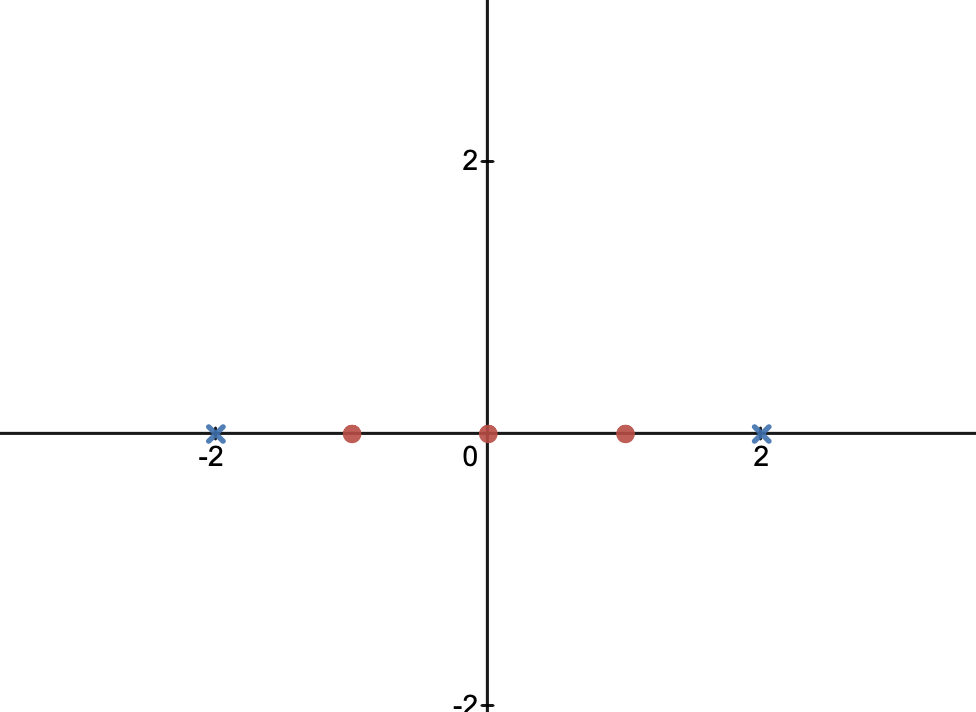

Now we lift points on x-axis to x-y plane. For each point, we consider a new point $(x,x^2)$ in the xy-plane. Then, we can find a linear bound (green line) to separate all data points, see figure below

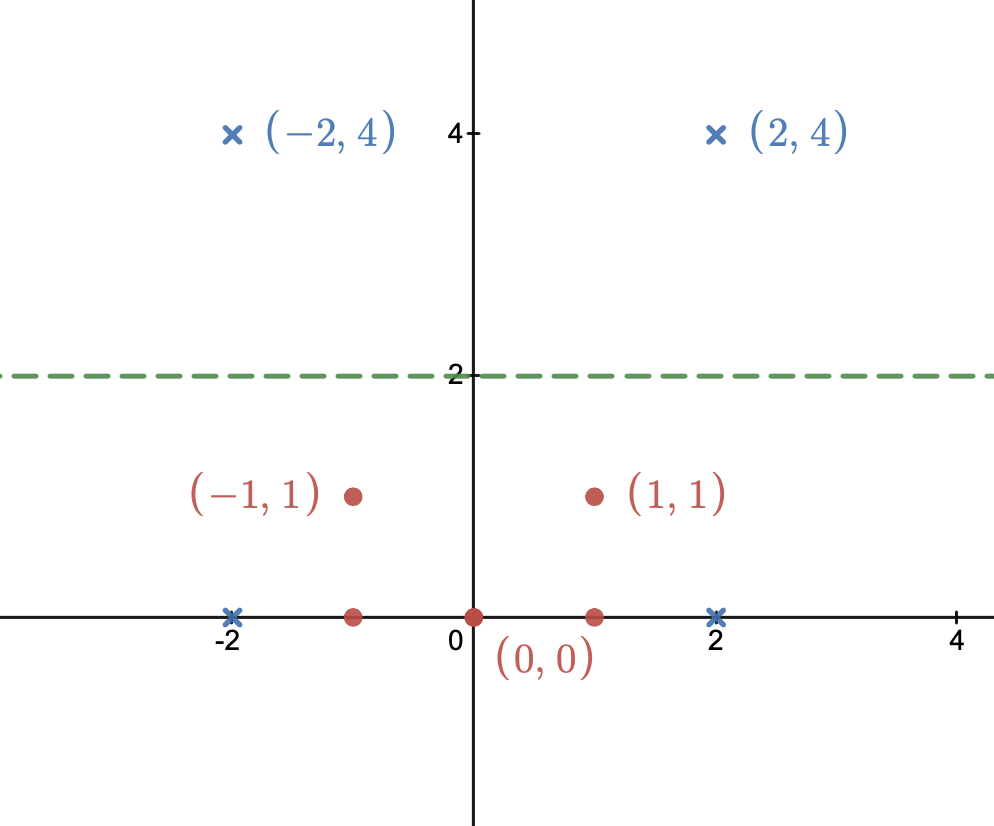

#### Import given data

- Read data from kernel_SVM.csv

- Check import data using pandas

- Save dataframe as a numpy array (delete first column which is index)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('kernel_SVM.csv', index_col= 'Unnamed: 0')
numpy_array = df.to_numpy()


print("Original DataFrame:")
print(df.head())

print("\nNumPy Array:")
print(numpy_array[:5, :])

Original DataFrame:
         X1        X2        X3  label
0  0.091798 -0.092935  0.067558      0
1 -0.385895 -0.037972  0.403482      0
2  0.410838  0.653420 -0.307511      0
3  0.055914 -0.356184  0.291054      0
4  0.381151  0.044670 -0.809671      0

NumPy Array:
[[ 0.09179845 -0.09293466  0.06755822  0.        ]
 [-0.38589501 -0.03797156  0.4034817   0.        ]
 [ 0.41083839  0.6534201  -0.30751096  0.        ]
 [ 0.05591387 -0.35618358  0.29105419  0.        ]
 [ 0.3811508   0.04466982 -0.80967084  0.        ]]


#### Visualize data

Visualize your data. You may use 3D scatter plots. Please use different colors or different markers to represent different classes.

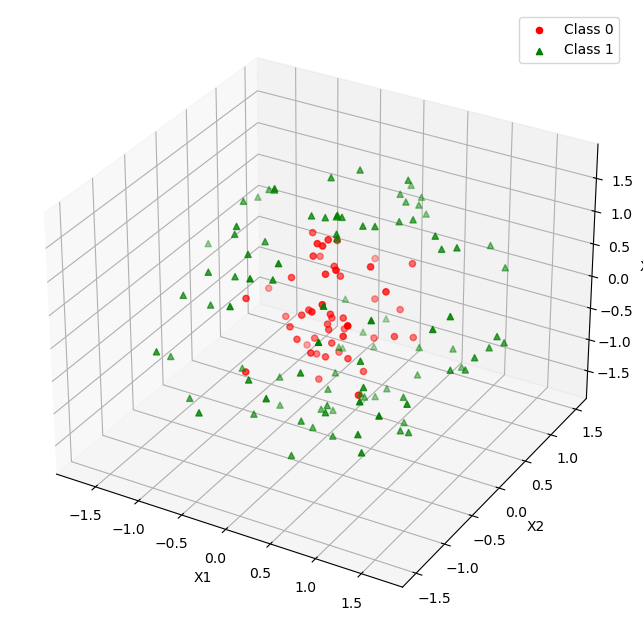

In [9]:
target_column = df.columns[-1]

# Separate features and target variable
features = df.drop(target_column, axis=1)
target = df[target_column]

# Visualize data using a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign different colors or markers to different classes
classes = target.unique()
colors = ['r', 'g', 'b', 'y']  # You can customize the colors based on the number of classes
markers = ['o', '^', 's', 'd']  # You can customize the markers based on the number of classes

for i, class_label in enumerate(classes):
    class_data = features[target == class_label]
    ax.scatter(class_data.iloc[:, 0], class_data.iloc[:, 1], class_data.iloc[:, 2],
               c=colors[i], marker=markers[i], label=f'Class {class_label}')

ax.set_xlabel(features.columns[0])
ax.set_ylabel(features.columns[1])
ax.set_zlabel(features.columns[2])
ax.legend()
plt.show()

#### Construct your kernel SVM model

To implement kernel method, please check this documentation https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

Hint: There are many kernels you can use, but only one works well for our data set. Please explore which one is the best one.

In [10]:
target_column = df.columns[-1]
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Make the SVM- Gaussian Kernel
svm_model = SVC(kernel='rbf', C=500.0, gamma='scale')

# Train the data
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy:.2f}")


0.93
